# Actividad 2: Validación y evaluación en regresión y clasificación.

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics 
from math import sqrt

from sklearn import preprocessing

from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree 

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, LeaveOneOut

import matplotlib.pyplot as plt
import graphviz
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
def training_test_error(dataset, algo, score, title, y_title):
    '''Ex1 & 2. 
    Function to display differences between training error and test error with hold-out validation'''
    # lists to append data
    interval=[]
    training_error=[]
    test_error=[]
    for r in range(60,91, 5): # required sizes of train set
        percent_size = r/100  # Adrián: si le pasas un int lo entiende como número de muestras y no porcentaje de muestras
        interval.append(percent_size) 
    
        # creating our sets
        X_train, X_test,y_train,y_test = train_test_split(dataset.data,dataset.target, 
                                                          train_size= percent_size, random_state=42) 
    
        # fit the model
        algo.fit(X_train, y_train)
    
        # training set: inferences and score
        y_train_pred= algo.predict(X_train)
        y_test_pred = algo.predict(X_test)
        
        # In order to implement RMSE I need to implement the sqrt, so i resolved it adding the "regression case" with sqrt
        if score == metrics.mean_squared_error: 
            score_train= sqrt(score(y_train, y_train_pred))
            score_test= sqrt(score(y_test, y_test_pred))

        # in the other hand, to implement sensivity I need to use the average flag
        else:
            score_train= score(y_train, y_train_pred, average="micro")
            score_test= score(y_test, y_test_pred, average="micro")

        # list of scores
        training_error.append(score_train)
        test_error.append(score_test)
        
    # df of results
    ex = pd.DataFrame(
            {'train_size': interval,
             'training_error': training_error,
             'test_error': test_error
            })
    display(ex)

    # Plotting results. I really like plotting with pandas
    ex.plot(x="train_size",y= ["training_error","test_error"], figsize= (10,5), title=title )
    plt.ylabel(y_title)
    plt.show()        

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error RMSE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 60%-40% hasta un 90%-10%, de 5% en 5%) para un dataset de regresión (el que se desee).

- Validation hold-out: I'll use just the *predict* method, not the cross-validation.
- I'll use the function above:

,train_size,training_error,test_error
0,0.60,1.151831,1.157096
1,0.65,1.152885,1.155864
2,0.70,1.157492,1.145572
3,0.75,1.155125,1.150334
4,0.80,1.156191,1.144856
5,0.85,1.155536,1.144775
6,0.90,1.153829,1.154820


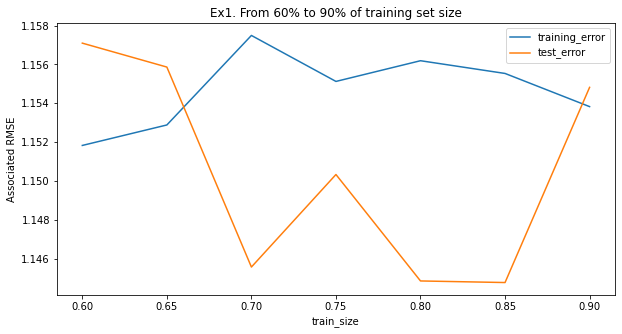

In [ ]:
dataset = datasets.fetch_california_housing() # getting data
algo= DummyRegressor() 
score = metrics.mean_squared_error #it's already implemented in the function the sqrt(MSE)
title="Ex1. From 60% to 90% of training set size" 
y_title = 'Associated RMSE' 

training_test_error(dataset, algo, score, title, y_title)

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de sensibilidad, en lugar de MAE).

- Following the same process

,train_size,training_error,test_error
0,0.60,0.400000,0.316667
1,0.65,0.329897,0.339623
2,0.70,0.304762,0.466667
3,0.75,0.276786,0.289474
4,0.80,0.358333,0.433333
5,0.85,0.377953,0.260870
6,0.90,0.325926,0.266667


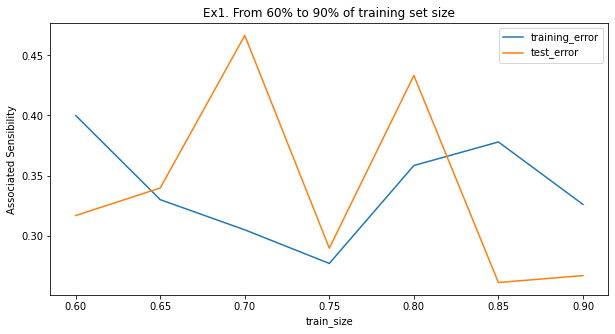

In [ ]:
dataset = datasets.load_iris() # getting data
algo= DummyClassifier() 
score = metrics.recall_score # visto en clase. Sensibilidad es relacionado con recall_score. https://github.com/albertovpd/viu-aprendizaje_supervisado/blob/main/jupyters_clase/Programa11.EvaluacionClasificacion.ipynb
title="Ex1. From 60% to 90% of training set size" 
y_title = 'Associated Sensibility'

training_test_error(dataset, algo, score, title, y_title)

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

- Leave-one-out => as much folders as dataset instances.

In [ ]:
# WARNING
computationally intensive. I just write words here to avoid running all.

In [3]:
algos = {
    "ols": LinearRegression(),
    "knn": KNeighborsRegressor(n_neighbors=10)
}

metrics_dict= {
    "mae": metrics.mean_absolute_error,
    "rmse": lambda y,y_pred: sqrt(metrics.mean_squared_error(y,y_pred)),
    "mape": lambda y,y_pred: np.mean(np.abs(y-y_pred)/y)*100
}

datas={
    "housing": datasets.fetch_california_housing(),
    "diabetes": datasets.load_diabetes(),
    "boston": datasets.load_boston()
}
normalization=["yes","no"]

In [ ]:
# we can keep playing here.

In [ ]:
# create columns for future dataframe:
dataset_list=[]
algos_list=[]
metric_list=[]
score_list=[]

for a in algos:
    for m in metrics_dict:
        for d in datas:
            # for n in normalization: iba a normalizar para KNN, pero no lo pide el ej, y está hecho en un ej posterior,
            # me ahorro un paso, que ya tarda esto de por sí.
            data = datas[d].data
            target = datas[d].target
            
            # leave-one-out = len(data)
            y_pred = cross_val_predict(algos[a], 
                                       data, target,
                                       cv = KFold(n_splits=len(data), shuffle=True, random_state=42),
                                       n_jobs=-1)  
            # To perform the leave-one-out I could have done also: cv= LeaveOneOut()
        
            # metrics
            score = metrics_dict[m](target, y_pred)
            
            dataset_list.append(d)
            algos_list.append(a)
            metric_list.append(m)
            score_list.append(score)

**It's really important to normalize/standarize before applying KNN, but it's not asked in the exercise, and we'll see later in the 5th ex**.

In [ ]:
# Creating df with results
ex3 = pd.DataFrame(
            {"dataset": dataset_list,
             'model': algos_list,
             'metric': metric_list,
             'score': score_list
            })
ex3.sort_values(by=["dataset", "metric"], inplace=True)
display(ex3)

,dataset,model,metric,score
2,boston,ols,mae,3.382797
11,boston,knn,mae,4.481443
8,boston,ols,mape,17.005266
17,boston,knn,mape,21.326791
5,boston,ols,rmse,4.870908
14,boston,knn,rmse,6.481980
1,diabetes,ols,mae,44.355661
10,diabetes,knn,mae,46.242760
7,diabetes,ols,mape,39.675879
16,diabetes,knn,mape,40.479996


Comments:
- It looks like linear reg performs better than KNN in all datasets.
- Again, it coulb be better normalizing/ standarizing before applying KNN. In further exercises is implemented.
- RMSE >1 sounded controversial at first. Maybe it could be better using R2, which always is between 0 and 1, to test the goodness of models (regression talk)

### Ejercicio 4 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada con 5 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

- For this ex I used some of the course functions.
- I had problems delivering AUC results. Looking on the internet, instead of the sk-learn roc_auc metric, I used a function (to deal with the AUC problem with multiclasses).
- Also I changed the delivered results. Instead of populating lists that will be turned into a dataframe, I generate a dictionary of metrics.

In [4]:
# # Functions we need 

def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    '''Computes auc for multiclass classification'''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred, average=average)

def evaluacion(y_true, y_pred, metricas):
  '''from the course: it creates a dictionary with results '''
  res = {}
  for nombre, funcion in metricas.items():
      res[nombre] = funcion(y_true, y_pred)
  return res

In [5]:
# step1: data.

datas = {
  'iris': datasets.load_iris(),
  'wine': datasets.load_wine(),
  'cancer': datasets.load_breast_cancer()
}

# step 2: models.

algos={
    "cart": tree.DecisionTreeClassifier(random_state=42,class_weight='balanced' ),
    "logr": LogisticRegression(solver='sag',max_iter=1000, random_state=42,multi_class='ovr')
    }

# step3: building experiments.

experiments = {
  'cart => iris': (algos['cart'], datas['iris']),
  'cart => wine': (algos['cart'], datas['wine']),
  'cart => cancer': (algos['cart'], datas['cancer']),
  'logr => iris': (algos['logr'], datas['iris']),
  'logr => wine': (algos['logr'], datas['wine']),
  'logr => cancer': (algos['logr'], datas['cancer'])
}

# step4: metrics

used_metrics = {
  "auc":  lambda y, y_pred: multiclass_roc_auc_score(y, y_pred, average='micro'),
  'accuracy':    metrics.accuracy_score,
  'precission':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
                                  average='micro'),
  'recall': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
                               average='micro'),
  'f1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')
}

In [11]:
# step 5. validation and predictions

y_pred = {}
for name, exp in experiments.items(): 
  y_pred[name] = cross_val_predict(exp[0], exp[1].data, exp[1].target, cv=KFold(n_splits=5,shuffle=True,random_state=42))


  # 6.1. Generación de métricas de evaluación para generar tablas numéricas).
  eval = evaluacion(exp[1].target, y_pred[name], used_metrics)
  print("Matriz de confusión (%s):\n%s" % (name, metrics.confusion_matrix(exp[1].target, y_pred[name])))
  print("Tabla de métricas (%s):\n%s" % (name, metrics.classification_report(exp[1].target, y_pred[name], digits=3)), "\n")
   
  # Results
  results_df= pd.DataFrame.from_dict(eval, orient='index').T
  print(name)
  print(eval)
  display(results_df)
  print(" ")


Matriz de confusión (cart => iris):
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Tabla de métricas (cart => iris):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.922     0.940     0.931        50
           2      0.939     0.920     0.929        50

    accuracy                          0.953       150
   macro avg      0.953     0.953     0.953       150
weighted avg      0.953     0.953     0.953       150
 

cart => iris
{'auc': 0.9650000000000001, 'accuracy': 0.9533333333333334, 'precission': 0.9533333333333334, 'recall': 0.9533333333333334, 'f1': 0.9533333333333334}


,auc,accuracy,precission,recall,f1
0,0.965,0.953333,0.953333,0.953333,0.953333


 
Matriz de confusión (cart => wine):
[[56  3  0]
 [ 3 67  1]
 [ 1  5 42]]
Tabla de métricas (cart => wine):
              precision    recall  f1-score   support

           0      0.933     0.949     0.941        59
           1      0.893     0.944     0.918        71
           2      0.977     0.875     0.923        48

    accuracy                          0.927       178
   macro avg      0.934     0.923     0.927       178
weighted avg      0.929     0.927     0.927       178
 

cart => wine
{'auc': 0.9452247191011236, 'accuracy': 0.9269662921348315, 'precission': 0.9269662921348315, 'recall': 0.9269662921348315, 'f1': 0.9269662921348315}


,auc,accuracy,precission,recall,f1
0,0.945225,0.926966,0.926966,0.926966,0.926966


 
Matriz de confusión (cart => cancer):
[[193  19]
 [ 18 339]]
Tabla de métricas (cart => cancer):
              precision    recall  f1-score   support

           0      0.915     0.910     0.913       212
           1      0.947     0.950     0.948       357

    accuracy                          0.935       569
   macro avg      0.931     0.930     0.930       569
weighted avg      0.935     0.935     0.935       569
 

cart => cancer
{'auc': 0.9299785952116695, 'accuracy': 0.9349736379613357, 'precission': 0.9349736379613357, 'recall': 0.9349736379613357, 'f1': 0.9349736379613357}


,auc,accuracy,precission,recall,f1
0,0.929979,0.934974,0.934974,0.934974,0.934974


 
Matriz de confusión (logr => iris):
[[50  0  0]
 [ 0 44  6]
 [ 0  2 48]]
Tabla de métricas (logr => iris):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.957     0.880     0.917        50
           2      0.889     0.960     0.923        50

    accuracy                          0.947       150
   macro avg      0.948     0.947     0.947       150
weighted avg      0.948     0.947     0.947       150
 

logr => iris
{'auc': 0.9600000000000001, 'accuracy': 0.9466666666666667, 'precission': 0.9466666666666667, 'recall': 0.9466666666666667, 'f1': 0.9466666666666667}


,auc,accuracy,precission,recall,f1
0,0.96,0.946667,0.946667,0.946667,0.946667


 
Matriz de confusión (logr => wine):
[[53  6  0]
 [ 5 66  0]
 [ 5 19 24]]
Tabla de métricas (logr => wine):
              precision    recall  f1-score   support

           0      0.841     0.898     0.869        59
           1      0.725     0.930     0.815        71
           2      1.000     0.500     0.667        48

    accuracy                          0.803       178
   macro avg      0.856     0.776     0.783       178
weighted avg      0.838     0.803     0.793       178
 

logr => wine
{'auc': 0.8525280898876405, 'accuracy': 0.8033707865168539, 'precission': 0.8033707865168539, 'recall': 0.8033707865168539, 'f1': 0.8033707865168539}


,auc,accuracy,precission,recall,f1
0,0.852528,0.803371,0.803371,0.803371,0.803371


 
Matriz de confusión (logr => cancer):
[[181  31]
 [ 12 345]]
Tabla de métricas (logr => cancer):
              precision    recall  f1-score   support

           0      0.938     0.854     0.894       212
           1      0.918     0.966     0.941       357

    accuracy                          0.924       569
   macro avg      0.928     0.910     0.918       569
weighted avg      0.925     0.924     0.924       569
 

logr => cancer
{'auc': 0.9100800697637546, 'accuracy': 0.9244288224956063, 'precission': 0.9244288224956063, 'recall': 0.9244288224956063, 'f1': 0.9244288224956063}


,auc,accuracy,precission,recall,f1
0,0.91008,0.924429,0.924429,0.924429,0.924429


Comments:

- I was asked to deliver results for certain datasets and models, and results are presented, regardless there is no visualization, like in Jupyters 16 and 17 of the course.
- I do not understand why *print(metrics)* and dataframes are differents, attending to the confusion_matrix elements. I would like to have some feedback about it.

### Ejercicio 5 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos (k tomando los valores 1, 3, 5 y 7); b) función de distancia Minkowski (con q tomando los valores 1, 2, 3, 4; c) con/sin estandarización previa de atributos. Use tres datasets diferentes en validación cruzada con 10 bolsas en la comparativa de resultados.

- https://github.com/albertovpd/viu-aprendizaje_supervisado/blob/main/jupyters_clase/Programa14.Regresion.KNN2.ipynb

In [13]:
# the requisites of the statement
neighbours = list(range(1,8,2))
q_distance = list(range(1,5))

normalization=["yes","no"]

metrics_dict= {
    "mae": metrics.mean_absolute_error,
    "rmse": lambda y,y_pred: sqrt(metrics.mean_squared_error(y,y_pred)),
    "mape": lambda y,y_pred: np.mean(np.abs(y-y_pred)/y)*100,
    "r2": metrics.r2_score
}

datas={
    "housing": datasets.fetch_california_housing(),
    "diabetes": datasets.load_diabetes(),
    "boston": datasets.load_boston()
}

In [14]:
metrics_list=[]
score_list=[]
datas_list=[]
neighbours_list= []
q_distance_list= []
normalization_list=[]

for n in neighbours:
  for q in q_distance:
    for m in metrics_dict:
      for d in datas:
        for norm in normalization:
          
          data= datas[d].data
          target= datas[d].target
          
          if norm=="yes": #normalize the training set
            normalizer= preprocessing.MinMaxScaler()
            data = normalizer.fit_transform(data)
          
          

          model = KNeighborsRegressor(n_neighbors=n, p=q, n_jobs=-1)

          # cross validation with 10 bags
          y_pred = cross_val_predict(model, data,target, cv= KFold(n_splits=10, shuffle=True, random_state=42)) # minkowski set by default

          # metrics
          score = metrics_dict[m](target, y_pred)

          normalization_list.append(norm)
          q_distance_list.append(q)
          neighbours_list.append(n)
          metrics_list.append(m)
          score_list.append(score)
          datas_list.append(d)

In [15]:
# creating df with results
ex5 = pd.DataFrame(
    {'dataset': datas_list,
     "normalization":normalization_list,
     "neighbours": neighbours_list,
     "q_distance": q_distance_list,
     'metrics': metrics_list,
     'score': score_list
    })
ex5.sort_values(by=["dataset", "metrics"], inplace=True)
ex5.reset_index(inplace=True)

In [16]:
# now i have a huge dataset that I need to slice in order to have something readable. This is what i've got:
ex5.tail(20)

,index,dataset,normalization,neighbours,q_distance,metrics,score
364,150,housing,yes,3,3,rmse,0.657408
365,151,housing,no,3,3,rmse,1.089216
366,174,housing,yes,3,4,rmse,0.661578
367,175,housing,no,3,4,rmse,1.096722
368,198,housing,yes,5,1,rmse,0.599558
369,199,housing,no,5,1,rmse,0.989109
370,222,housing,yes,5,2,rmse,0.625492
371,223,housing,no,5,2,rmse,1.052126
372,246,housing,yes,5,3,rmse,0.635232
373,247,housing,no,5,3,rmse,1.067788


In [ ]:
# i'm now i'm going to perform some monkey job to slice and present it properly. The goal is reducing the sie little by little.

result5 = ex5.loc[:31][["normalization","neighbours","q_distance","score"]]
result5.rename(columns={"score":"mae_boston"},inplace=True)
result5["mae_diabetes"] =list(ex5.loc[128:159]["score"])
result5["mae_housing"] =list(ex5.loc[256:287]["score"])

result5["mape_boston"] =list(ex5.loc[32:63]["score"])
result5["mape_diabetes"] =list(ex5.loc[160:191]["score"])
result5["mape_housing"] =list(ex5.loc[288:319]["score"])

result5["r2_boston"] = list(ex5.loc[64:95] ["score"])
result5["r2_diabetes"] = list(ex5.loc[192:223] ["score"])
result5["r2_housing"] = list(ex5.loc[320:351] ["score"])

result5["rmse_boston"] = list(ex5.loc[96:127]["score"]) 
result5["rmse_diabetes"] = list(ex5.loc[224:255]["score"]) 
result5["rmse_housing"] = list(ex5.loc[352:]["score"]) 
result5


,normalization,neighbours,q_distance,mae_boston,mae_diabetes,mae_housing,mape_boston,mape_diabetes,mape_housing,r2_boston,r2_diabetes,r2_housing,rmse_boston,rmse_diabetes,rmse_housing
0,yes,1,1,3.133004,59.300905,0.474142,14.868496,49.617930,25.050682,0.738935,-0.025664,0.591232,4.694566,77.987628,0.737764
1,no,1,1,4.040119,59.074661,0.882523,18.918356,49.810871,53.357623,0.528486,-0.011799,-0.081786,6.309117,77.458718,1.200188
2,yes,1,2,3.025099,58.110860,0.496190,14.470376,47.602191,26.166169,0.752653,0.004070,0.561891,4.569565,76.848870,0.763783
3,no,1,2,4.481028,58.038462,0.927497,20.748448,47.960555,56.670138,0.431876,-0.003977,-0.168621,6.925370,77.158722,1.247429
4,yes,1,3,3.070553,58.488688,0.505725,14.678823,48.632744,26.676086,0.744381,-0.010526,0.551399,4.645349,77.409968,0.772874
5,no,1,3,4.691700,57.916290,0.945106,21.938292,48.556480,58.255117,0.382092,0.000945,-0.202161,7.222432,76.969333,1.265203
6,yes,1,4,3.012253,59.106335,0.509437,14.278413,50.023873,26.881143,0.758385,-0.012347,0.545704,4.516303,77.479686,0.777765
7,no,1,4,4.820751,57.977376,0.951812,22.311285,48.730189,58.772300,0.337642,0.013022,-0.215828,7.477697,76.502713,1.272374
8,yes,3,1,2.676877,48.410256,0.410022,12.474443,40.686233,21.763552,0.794656,0.338806,0.709615,4.163541,62.616307,0.621821
9,no,3,1,3.920356,49.018854,0.770537,18.421898,41.301729,48.476117,0.601474,0.342135,0.220547,5.800292,62.458483,1.018764


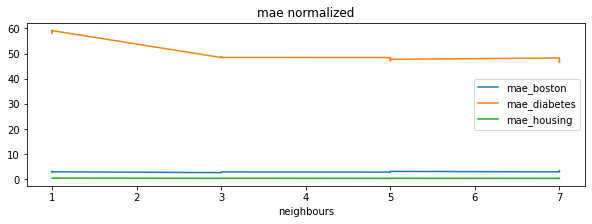

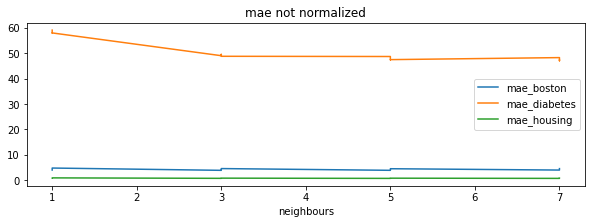

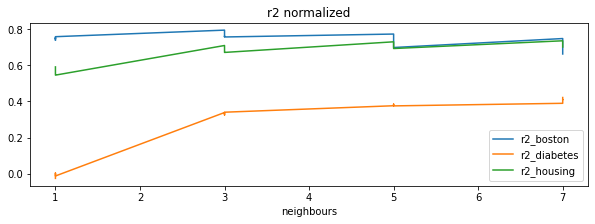

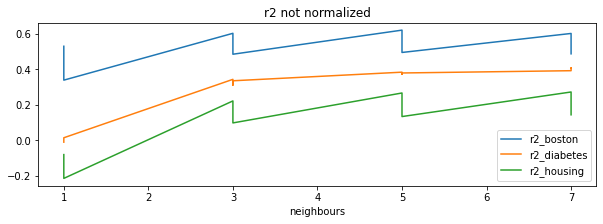

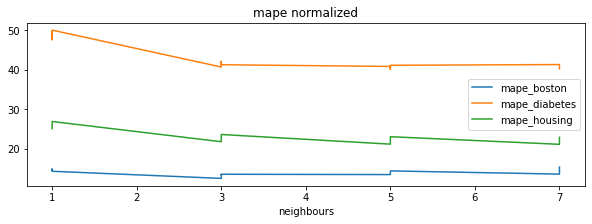

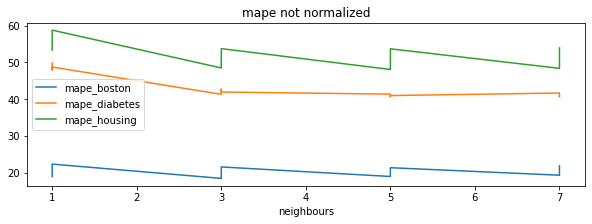

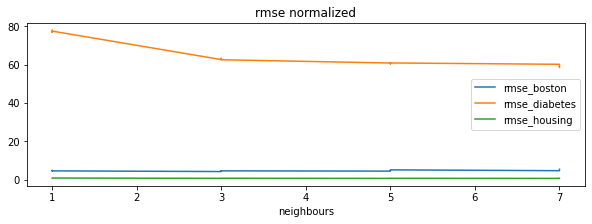

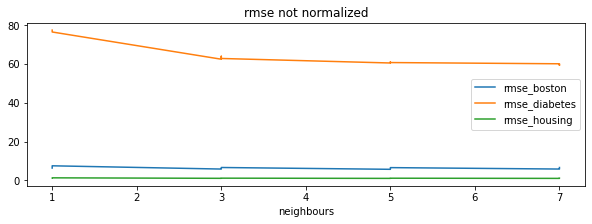

In [ ]:
# let's plot some results to shed some light here
result5[result5["normalization"]=="yes"].plot(x="neighbours", y=["mae_boston",	"mae_diabetes",	"mae_housing"], figsize=[10,3], title="mae normalized")
result5[result5["normalization"]=="no"].plot(x="neighbours", y=["mae_boston",	"mae_diabetes",	"mae_housing"], figsize=[10,3], title="mae not normalized")

result5[result5["normalization"]=="yes"].plot(x="neighbours", y=["r2_boston",	"r2_diabetes",	"r2_housing"], figsize=[10,3], title="r2 normalized")
result5[result5["normalization"]=="no"].plot(x="neighbours", y=["r2_boston",	"r2_diabetes",	"r2_housing"], figsize=[10,3], title="r2 not normalized")

result5[result5["normalization"]=="yes"].plot(x="neighbours", y=["mape_boston",	"mape_diabetes",	"mape_housing"], figsize=[10,3], title="mape normalized")
result5[result5["normalization"]=="no"].plot(x="neighbours", y=["mape_boston",	"mape_diabetes",	"mape_housing"], figsize=[10,3], title="mape not normalized")

result5[result5["normalization"]=="yes"].plot(x="neighbours", y=["rmse_boston",	"rmse_diabetes",	"rmse_housing"], figsize=[10,3], title="rmse normalized")
result5[result5["normalization"]=="no"].plot(x="neighbours", y=["rmse_boston",	"rmse_diabetes",	"rmse_housing"], figsize=[10,3], title="rmse not normalized")

Comments:
- In average, in all datasets error is lower normalizing data. Nevertheless, some metrics, like RMSE are more affected than others.